# MW models:

In [2]:
%pylab inline
from astropy import units 
from astropy import constants as const
from octopus.cosmotools import rvir, concentration
from octopus.profiles import *
import os.path
from scipy.special import kv, iv

Populating the interactive namespace from numpy and matplotlib


## To-Do:

use galkin to overplot the data:
https://github.com/galkintool/galkin

In [3]:
font = {'size':18, 'family':'serif'}
matplotlib.rc('font', **font)

In [5]:
# Constants
h = 0.7
H = 70*units.km/units.s/units.Mpc 
H_code = 3.2407789E-18/units.s*0.7 # GalIC value
print(H_code) 
print(H.to(1/units.s))

2.26854523e-18 1 / s
2.268545502628829e-18 1 / s


Here we model of the MW, our first model is for a MW of mass $ M_{vir}=1E12 M\odot$.
The MW have a bulge a disk and dark matter halo:

- The MW Bulge have a mass of $M_b = 1E10 M\odot$ this is modeled with a 
Hernquist profile with scale length $r_b = 0.7 kpc$.

- The disk of the MW have a mass of $M_d = 6.5E10 M\odot$ and is modeled as ...

- The Dark Matter halo have a total mass of $M_h = M_{vir} - M_d - M_b$


$M_h = M_{vir} - M_b - M_d =  1E12 - 6.5E10 - 1E10 = 9.25E11 M\odot$

## Facundo's models:
From http://adsabs.harvard.edu/abs/2015ApJ...802..128G

In [6]:
cc1 = 9.86 # # NFW concentration for the 1x10^12Msun halo 
cc2 = 9.56 # NFW concentration for the 1.5x10^12Msun halo 
cc3 = 9.359 # NFW concentration for the 2x10^12Msun halo 
ra = 3.5 # Disk scale length
rb = 0.53 # Disk high
c_b = 0.7 # Bulge scale length

In [7]:
r = linspace(0.1, 300, 1000)
Vc_Halo1 = vc_NFW(cc1, 0, r, 0, 1E12)
Vc_Disk1 = vc_mn(3.5, 0.53, 0, r, 0, 6.5E10)
Vc_bulge1 = vc_hernquist(0.7, 0, r, 0, 1E10)
Vc_MW1 = np.sqrt(Vc_Halo1**2 + Vc_Disk1**2 + Vc_bulge1**2)

Vc_Halo2 = vc_NFW(cc2, 0, r, 0, 1.5E12)
Vc_Disk2 = vc_mn(3.5, 0.53, 0, r, 0, 5.5E10)
Vc_bulge2 = vc_hernquist(0.7, 0, r, 0, 1E10)
Vc_MW2 = np.sqrt(Vc_Halo2**2 + Vc_Disk2**2 + Vc_bulge2**2)

Vc_Halo3 = vc_NFW(cc3, 0, r, 0, 1E12)
Vc_Disk3 = vc_mn(3.5, 0.53, 0, r, 0, 5E10)
Vc_bulge3 = vc_hernquist(0.7, 0, r, 0, 1E10)
Vc_MW3 = np.sqrt(Vc_Halo3**2 + Vc_Disk3**2 + Vc_bulge3**2)

In [8]:
mwf = loadtxt('../data/MW_models/f/MW_model.txt') 

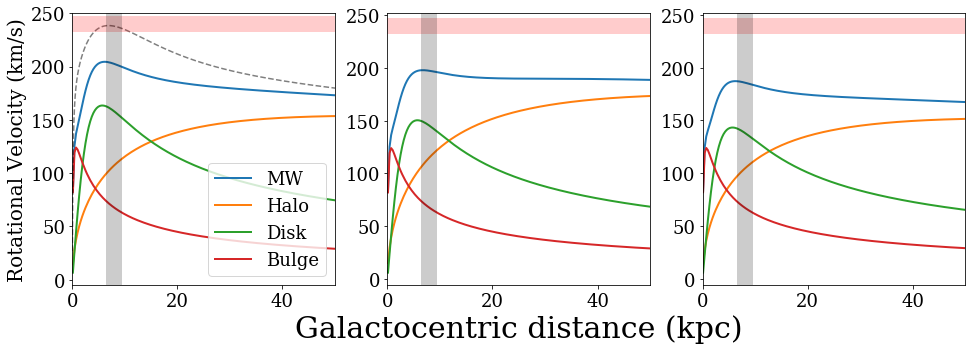

In [9]:
figure(figsize=(16, 5))
subplot(1, 3, 1)
plot(r, Vc_MW1, lw=2, label='MW')
plot(r, Vc_Halo1, lw=2, label='Halo')
plot(r, Vc_Disk1, lw=2, label='Disk')
plot(r, Vc_bulge1, lw=2, label='Bulge')
plot(mwf[:,0], mwf[:,2], c='k', ls='--', alpha=0.5)
legend(loc='lower right')
#axhline(170, lw=16, alpha=0.2)
axhline(240, lw=16, alpha=0.2, c='r')
axvline(8, lw=16, alpha=0.2, c='k')
ylabel('Rotational Velocity (km/s)', fontsize=20)
xlim(0, 50)

subplot(1, 3, 2)
plot(r, Vc_MW2, lw=2, label='Total')
plot(r, Vc_Halo2, lw=2, label='Halo')
plot(r, Vc_Disk2, lw=2, label='Disk')
plot(r, Vc_bulge2, lw=2, label='Bulge')
#axhline(170, lw=16, alpha=0.2)
axhline(240, lw=16, alpha=0.2, c='r')
axvline(8, lw=16, alpha=0.2, c='k')
xlabel('Galactocentric distance (kpc)', fontsize=30)
xlim(0, 50)

subplot(1, 3, 3)
plot(r, Vc_MW3, lw=2, label='Total')
plot(r, Vc_Halo3, lw=2, label='Halo')
plot(r, Vc_Disk3, lw=2, label='Disk')
plot(r, Vc_bulge3, lw=2, label='Bulge')
#axhline(170, lw=16, alpha=0.2)
axhline(240, lw=16, alpha=0.2, c='r')
axvline(8, lw=16, alpha=0.2, c='k')
xlim(0, 50)
savefig('facundos_models.png', bbox_inches='tight')

----------------------------------------------

# Chervin's model:

## Model 1

(0, 140)

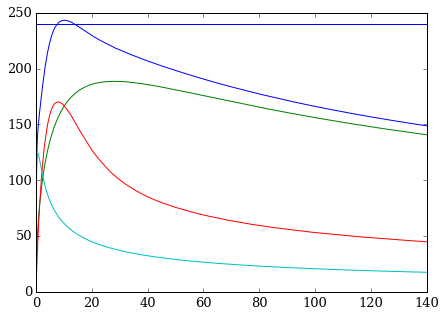

In [8]:
figsize(7, 5)
Crot_curve1 = loadtxt('../data/ICs/MW/chervin/MWch1.txt', skiprows=1)
plot(Crot_curve1[:,0], Crot_curve1[:,1])
plot(Crot_curve1[:,0], Crot_curve1[:,2])
plot(Crot_curve1[:,0], Crot_curve1[:,3])
plot(Crot_curve1[:,0], Crot_curve1[:,4])
axhline(240)
xlim(0, 140)

## Model 2

In [23]:
Vc_Ch = 175.0
cc_200 = 9.6

In [27]:
# The R200, M200 and Rs200 values corresponding to the rotational velocity are:
#Here I use the same equations that GalIC have.
def GalIC(v200, cc):
    v200 = v200 * units.km  / units.s
    R200 = v200 / (10.0 * H_code)
    M200 = v200**3.0 / (10*H_code*G)
    Rs200 = R200 / cc
    R200 = R200.to('kpc')
    M200 = M200.to('Msun')
    Rs200 = Rs200.to('kpc')
    return R200, M200, Rs200

In [28]:
R200, M200, Rs200 = GalIC(Vc_Ch, cc_200)
print(R200)
print(M200)
print(Rs200) 

250.00003004445597 kpc
1779648756548.042 solMass
26.041669796297498 kpc


In [29]:
# This is the rotation curve from GalIC of Chervin's model
Crot_curve = loadtxt('chervinMW_rotcurve.txt', skiprows=1)
r = Crot_curve[:,0] 
MW = Crot_curve[:,1]
a = Crot_curve[:,2]
b = Crot_curve[:,3]
cb = Crot_curve[:,4]

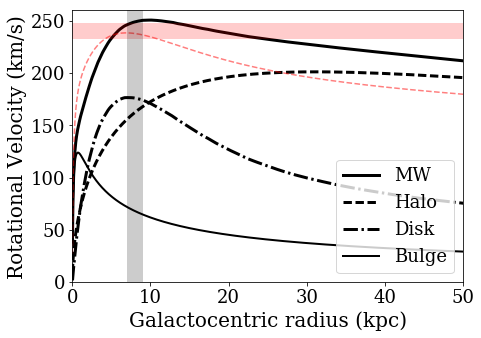

In [30]:
figure(figsize=(7, 5))
plot(r, MW, lw=3, label='MW', c='k')
plot(r, a, lw=3, label='Halo', ls='--', c='k')
plot(r, b, lw=3, label='Disk', ls='-.', c='k')
plot(r, cb, lw=2, label='Bulge', ls='-', c='k')
plot(mwf[:,0], mwf[:,2], c='r', ls='--', alpha=0.5)

#axhline(170, lw=16, alpha=0.2)
axhline(240, lw=16, alpha=0.2, c='r')
axvline(8, lw=16, alpha=0.2, c='k')
legend(loc='lower right')
xlim(0, 50)
ylim(0, 260)
ylabel('Rotational Velocity (km/s)', fontsize=20)
xlabel('Galactocentric radius (kpc)', fontsize=20)
savefig('RC_chervins_model.png', bbox_inches='tight')

In [31]:
# The mass of the disk and bulge are set by Md and Mb

In [32]:
Md = 0.0524 
Mb = 0.0082
Mdisk = Md * M200
Mbulge = Mb * M200
M200halo = M200 - M200*Md - M200 * Mb
print('Halo', M200halo)
print('Disk', M200*Md/1E10)
print('Bulge', M200*Mb/1E10)

Halo 1671802041901.2307 solMass
Disk 9.32535948431174 solMass
Bulge 1.4593119803693946 solMass


### The Halo mass at Rvir for the NFW profile is:

In [33]:
# Method from http://adsabs.harvard.edu/abs/2012ApJ...753....8V
def fx(x):
    f = np.log(1.+x) - (x / (1. + x))
    return f

#Computing cvir from c200
def c(cvir, c200):
    q = 2.058
    y = (c200 / cvir) - (fx(c200) / (q * fx(cvir)))**(1./3.)
    return y

def bissection(c200):
    min_cvir = 0.1
    max_cvir = 2*c200
    c_init = 0.5 * (min_cvir + max_cvir)
    y = c(c_init, c200)
    while abs(y) > 0.0002:
        #print c_init
        if y<0:
            max_cvir = c_init
        if y>0:
            min_cvir = c_init
        c_init = 0.5*(min_cvir + max_cvir)
        y = c(c_init, c200)
    return c_init

# Compouting a/rs using cvir
def ars(c):
    x = 1 / ((2.0*fx(c))**(-0.5) - (1.0/c)) # Van Der Marel exact solution#
    x2 = np.sqrt(2.0 * (log(1 + c) - c/(1+c))) # springel approx equation
    return x, x2

# Computing mvir from m200

def m200mvir(ar, c):
    """
    m200 mvir conversion
    
    """
    x = ar**2.0 / (2.0*fx(c)) 
    return x

def m200mvirNFW(Mvir, cvir, c200):
    M200 = Mvir * fx(c200) / fx(cvir)
    return M200
    
    

In [34]:
cvir = bissection(cc_200)
print(cvir)
print('cvir : ', cvir)
print('c200: ',cc_200)
a_rs200 = ars(cc_200)
a_rsvir = ars(cvir)

print('a/rs at r200:', a_rs200)
M200_NFW1 = M200halo / m200mvir(a_rs200[0], cc_200) 
Mvir_NFW1 = M200_NFW1 * fx(cvir) / fx(cc_200)

print('M200 Hern :', M200halo)
print('M200 NFW 1:', M200_NFW1)
print('Mvir NFW 1:', Mvir_NFW1)

12.867529296875002
cvir :  12.867529296875002
c200:  9.6
a/rs at r200: (2.0746685058770602, 1.7059857114053041)
M200 Hern : 1671802041901.2307 solMass
M200 NFW 1: 1130415754402.498 solMass
Mvir NFW 1: 1321875215668.5076 solMass


## Halo

In [18]:
a200_1 = Rs200 * a_rs200[0]
a200_2 = Rs200 * a_rs200[1]
print a200_1, a200_2 * 0.7

54.0278321668 kpc 31.0987016015 kpc


In [20]:
def mass_NFW2(c, x, y, z, M, a):
    x = x*units.kpc
    y = y*units.kpc
    z = z*units.kpc
    a = a * units.kpc
    M = M * units.Msun
    r = np.sqrt(x**2 + y**2 + z**2)
    f = np.log(1.0 + c) - (c / (1.0 + c))
    mass = M * (np.log(1 + r/a) - r/(a+r)) / f
    return mass.value

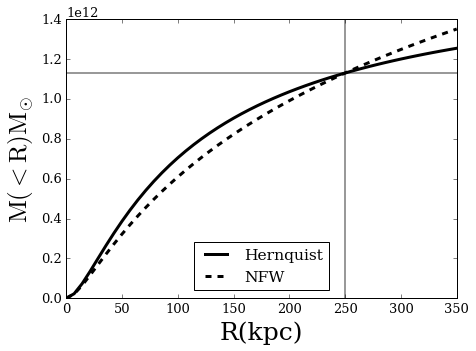

In [21]:
figure(figsize=(7, 5))
r2 = linspace(0, 350)
m1_enclosed = mass_hernquist(a200_1.value, r2, M200halo.value)
#m2_enclosed = mass_hernquist(a200_2.value, r2, M200halo.value)
#m3_enclosed = mass_NFW(cc_200, r2, 0, 0, Mvir_halo1)
m4_enclosed = mass_NFW2(cc_200, 0, r2, 0, M200_NFW1, Rs200.value)

plot(r2, m1_enclosed, c='k', lw=3, ls='-', label='Hernquist')
#plot(r2, m2_enclosed, c='k', lw=3, ls='--')
#plot(r2, m3_enclosed, lw=3, ls='-')
plot(r2, m4_enclosed, lw=3, ls='--', c='k', label='NFW')
axhline(1.13E12, lw=2, c='k', alpha=0.4)
axvline(R200.value, lw=2, c='k', alpha=0.4)
legend(loc='best')
xlabel('R(kpc)', fontsize=25)
ylabel('$\mathrm{M(<R)M_{\odot}}$', fontsize=25)
savefig('ME_halo.png', bbox_inches='tight')

## Disk

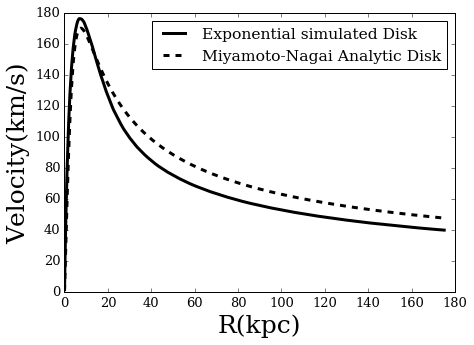

In [22]:
figure(figsize=(7, 5))
b_teo = vc_mn(4.63, 0.69,  0, r, 0, Mdisk.value)
plot(r, b, lw=3, label='Exponential simulated Disk', c='k')
#plot(r, b_teo, lw=2, label='Disk')
plot(r, b_teo, lw=3, label='Miyamoto-Nagai Analytic Disk', c='k', ls='--')
legend(loc='best')
xlabel('R(kpc)', fontsize=25)
ylabel('Velocity(km/s)', fontsize=25)
savefig('RC_disk.png', bbox_inches='tight')

## Bulge

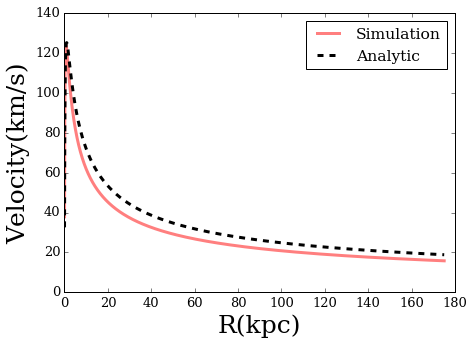

In [23]:
figure(figsize=(7, 5))
#c_teo = vc_hernquist(1.0, 0, r, 0, Mbulge.value)
c_teo = vc_hernquist(1.0, 0, r, 0, Mbulge.value)
plot(r, cb, lw=3, c='r', alpha=0.5, label='Simulation')
plot(r, c_teo, lw=3, ls='--', c='k', label='Analytic')
xlabel('R(kpc)', fontsize=25)
ylabel('Velocity(km/s)', fontsize=25)
legend()
savefig('RC_bulge.png', bbox_inches='tight')

-------------------------------------------------------------

-------------------------------------------------------------

In [373]:
MMW = 1E12
c = 10.0
rt = linspace(0.1, 400, 2000)
vcNFW = vc_NFW(c, 0, rt, 0, MMW)
MH1, a1, rs1 = hernquist_param(10, MMW)
MH2, a2, rs2 = hernquist_param2(10, MMW)
vc_H1 = vc_hernquist(a1, 0, rt, 0, MH1)
vc_H2 = vc_hernquist(a2, 0, rt, 0, MH2)
print MH1, MH2
print a1, a2
print rs1, rs2

MNFW1 = mass_NFW2(c, 0, rt, 0, MMW, a2)
MH1 = mass_hernquist(a1, rt, MH1)
MH2 = mass_hernquist(a2, rt,  MH2)

rhoNFW1 = dens_NFW(c, 0, rt, 0, MMW)
rhoH1 = dens_hernquist(a1, rt, MH1)
rhoH2 = dens_hernquist(a2, rt,  MH2)

1.46057661037e+12 1.61061811159e+12
54.7557132755 57.4994325992
26.2562957446 26.2562957446


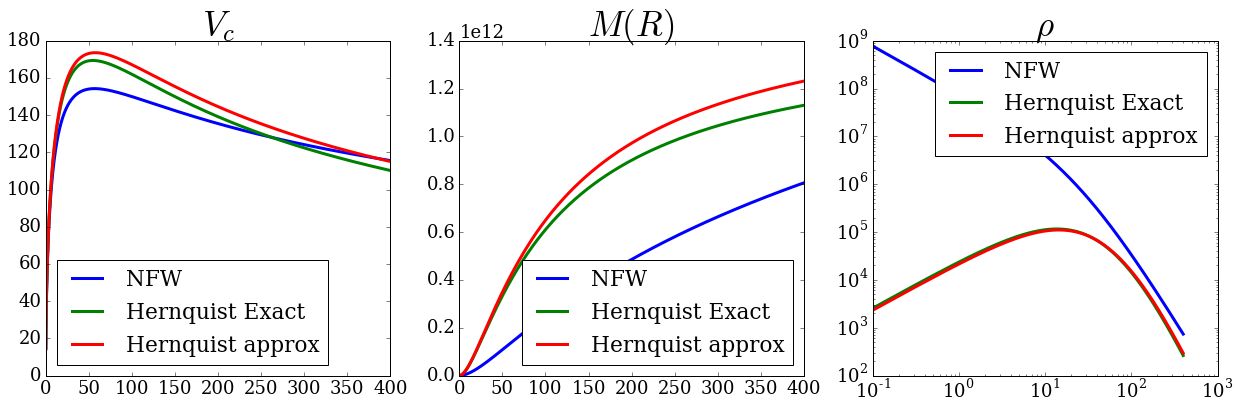

In [374]:
figsize(21, 6)
subplot(1, 3, 1)
title('$V_c$', fontsize=35)
plot(rt, vcNFW, lw=3, label='NFW')
plot(rt, vc_H1, lw=3, label='Hernquist Exact')
plot(rt, vc_H2, lw=3, label='Hernquist approx')
legend(loc='best')

subplot(1, 3, 2)
title('$M(R)$', fontsize=35)
plot(rt, MNFW1, lw=3, label='NFW')
plot(rt, MH1, lw=3, label='Hernquist Exact')
plot(rt, MH2, lw=3, label='Hernquist approx')
legend(loc='best')


subplot(1, 3, 3)
title(r'$\rho$', fontsize=35)
plot(rt, rhoNFW1, lw=3, label='NFW')
plot(rt, rhoH1, lw=3, label='Hernquist Exact')
plot(rt, rhoH2, lw=3, label='Hernquist approx')
xscale('log')
yscale('log')
legend(loc='best')

# Stable MW

In [23]:
r200, M200, rs200 = GalIC(156, 13.5)
print r200, M200, rs200
M_disk = M200 * 0.04
M_bulge= M200 * 0.012
M_halo200 = M200 - M_disk - M_bulge
print M_disk, M_bulge
print M_halo200

222.85716964 kpc 1.26064830577e+12 solMass 16.5079384918 kpc
50425932230.8 solMass 15127779669.2 solMass
1.19509459387e+12 solMass


In [26]:
cvir = bissection(13.5)
print cvir
print 'cvir : ', cvir
print 'c200: ',13.5
a_rs200_c = ars(13.5)
a_rsvir_c = ars(cvir)

print 'a/rs at r200:', a_rs200_c
M200_NFW1 = M_halo200 / m200mvir(a_rs200_c[0], 13.5) 
Mvir_NFW1 = M200_NFW1 * fx(cvir) / fx(13.5)

print 'M200 Hern :', M_halo200
print 'M200 NFW 1:', M200_NFW1
print 'Mvir NFW 1:', Mvir_NFW1

 17.96328125
cvir :  17.96328125
c200:  13.5
a/rs at r200: (2.1668325286827557, 1.8671444329070572)
M200 Hern : 1.19509459387e+12 solMass
M200 NFW 1: 8.87375464955e+11 solMass
Mvir NFW 1: 1.01572536755e+12 solMass


In [12]:
#PM11 data
haloPM = loadtxt('../data/MW_models/pm/halo1PM.csv', delimiter=',')
diskPM = loadtxt('../data/MW_models/pm/disk1PC.csv', delimiter=',')
MWPM = loadtxt('../data/MW_models/pm/MW1PM.csv', delimiter=',')
bulgePM = loadtxt('../data/MW_models/pm/BulgePM.csv', delimiter=',')

(1, 100)

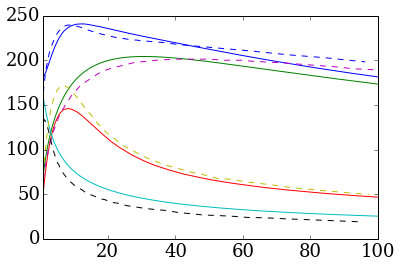

In [19]:
cs_rc = np.loadtxt('c-stable-rotcurve.txt', skiprows=1)
plot(cs_rc[:,0]/h, cs_rc[:,1])
plot(cs_rc[:,0]/h, cs_rc[:,2])
plot(cs_rc[:,0]/h, cs_rc[:,3])
plot(cs_rc[:,0]/h, cs_rc[:,4])

plot(haloPM[:,0], haloPM[:,1], ls='--')
plot(diskPM[:,0], diskPM[:,1], ls='--')
plot(bulgePM[:,0], bulgePM[:,1], ls='--')
plot(MWPM[:,0], MWPM[:,1], ls='--')
xlim(1, 100)

# Nico's Model

In [21]:
# Some useful functions

def hernquist_param(cc, Mvir):
    '''
    Return:
    -------
    Mh: Equivalent Hernquist Mass
    a:  Hernquist scale length 
    rs: NFW scale length
    '''
    a_rs = ars(cc)
    Mh = m200mvir(a_rs[0], cc) * Mvir
    rs = rvir(Mvir, 0) / cc
    a = a_rs[0] * rs
    return Mh, a.value, rs.value 

def hernquist_param2(cc, Mvir):
    '''
    Return:
    -------
    Mh: Equivalent Hernquist Mass
    a:  Hernquist scale length 
    rs: NFW scale length
    '''
    a_rs = ars(cc)
    Mh = m200mvir(a_rs[1], cc) * Mvir
    rs = rvir(Mvir, 0) / cc
    a = a_rs[1] * rs
    return Mh, a.value, rs.value 

def halo_properties(M):
    MW_halo_c = concentration(M)
    MW_halo_rvir = rvir(M, 0)
    R_H1 = MW_halo_rvir / MW_halo_c 
    return MW_halo_c, MW_halo_rvir, R_H1

def halo_mass(Mvir, Md, Mb):
    return Mvir - Md - Mb

In [17]:
rN = linspace(0, 400, 1000)


# $1.2 \times 10^{12} M_{\odot}$

In [19]:
Mvir_m1 = 1.2E12
Md1 = 5.5E10
Mb = 1E10
c1 = 15
MW_halo1 = Mvir_m1
print(MW_halo1)
Rvir_m1 = rvir(MW_halo1, 0).value
print(Rvir_m1)

1200000000000.0
279.0147766803976


In [20]:
Mhalo_H1, a1, rs1 = hernquist_param(c1, MW_halo1)
print('Halo Hernquist mass: ', Mhalo_H1)
print('Hernquist scale length: ', a1)
print('NFW scale length: ', rs1)
#print rvir(MW_halo1, 0).value
RvirN1 = c1 * rs1
print(RvirN1)

Halo Hernquist mass:  1.5771299254e+12
Hernquist scale length:  40.852871619537424
NFW scale length:  18.600985112026503
279.0147766803976



| Model | $M_{H, vir}(M_{\odot})$ | Hernquist halo scale length | Disk Mass | Disk Heigh | Disk scale length | Bulge Mass | Bulge Scale length | $\sigma_r/ \sigma_v$ | 
|---|---|---|---|---|---|---|---|---|
|MW1| 1.55E12 | 40.85 | 5.78E10 | 0.638 | 2.9 | 1.14E10 | 0.7 | 2.0 |
|MW2| 1.55E12 | 40.85 | 5.78E10 | 0.638 | 2.9 | 1.4E10 | 0.7 | 2.0 |
|MW3| 1.55E12 | 40.85 | 5.78E10 | 0.43 | 2.9 | 1.4E10 | 0.7 | 1.3 |
|MW4| 1.55E12 | 40.85 | 5.78E10 | 0.43 | 2.9 | 1.4E10 | 0.7 | 1.3 |


In [20]:
5.8E10/1.577E12

0.03677869372225745

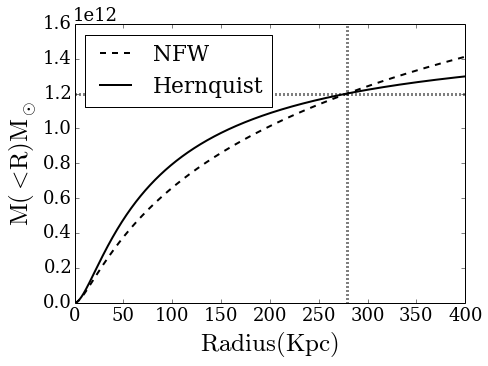

In [21]:
figure(figsize(7, 5))
MassNFWN = mass_NFW(c1, 0, rN, 0, MW_halo1)
MassHernN = mass_hernquist(a1, rN, Mhalo_H1)
plot(rN, MassNFWN, lw=2, c='k', ls='--', label='NFW')
plot(rN, MassHernN, lw=2, c='k', ls='-', label='Hernquist')
plt.axvline(rvir(MW_halo1, 0).value, lw=3, ls=':', c='k')
plt.axhline(MW_halo1, lw=3, ls=':', c='k')
legend(loc='best')
ylabel(r'$\mathrm{M(<R)M_{\odot}}$', fontsize=25)
xlabel(r'$\mathrm{Radius(Kpc)}$', fontsize=25)

In [22]:
def exponential_rc(r, r_d, M):
    M = M*units.Msun
    r_d = r_d * units.kpc
    r = r*units.kpc#np.sqrt(x**2.0 + y**2.0)*u.kpc
    y = r/(2*r_d)
    Sigma = M/(2.0*np.pi*r_d**2.0)
    G = const.G
    G = G.to(units.kpc**3/units.s**2/units.Msun)
    # Mod. Bessel functions.
    I0 = iv(0, y.value)
    I1 = iv(1, y.value)
    K0 = kv(0, y.value)
    K1 = kv(1, y.value)
    vc2 = 4.0*np.pi*G*Sigma*r_d*y**2.0*(I0*K0-I1*K1)
    vc = np.sqrt(vc2)    
    vc = vc.to(units.km/units.s)
    return vc.value

In [41]:
#PM11 data
haloPM = loadtxt('../data/MW_models/pm/halo1PM.csv', delimiter=',')
diskPM = loadtxt('../data/MW_models/pm/disk1PC.csv', delimiter=',')
MWPM = loadtxt('../data/MW_models/pm/MW1PM.csv', delimiter=',')
bulgePM = loadtxt('../data/MW_models/pm/BulgePM.csv', delimiter=',')

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:785: RuntimeWarning: invalid value encountered in true_divide
  return super(Quantity, self).__truediv__(other)


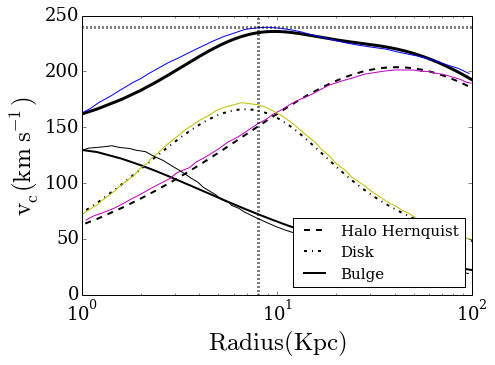

In [24]:
figure(figsize=(7, 5))
vrotN = vc_NFW(17., 0, rN, 0, MW_halo1)
#plot(rN, vrotN, lw=2, ls='--', c='k', alpha=0.5, label='Halo NFW')
#plot(mwf[:,0], mwf[:,2], c='r', ls='--', alpha=0.7, lw=2)

vhalo1 = vc_hernquist(a1, 0, rN, 0, Mhalo_H1)
plot(rN, vhalo1, lw=2, ls='--', c='k', label='Halo Hernquist')

teo_disk_vc = exponential_rc(rN, 3.2, 5.3E10)
plot(rN, teo_disk_vc, lw=2, ls='-.', c='k', label='Disk')

vbulge = vc_hernquist(0.7, 0, rN, 0, 1.14E10)
plot(rN, vbulge, lw=2, ls='-', c='k', label='Bulge')

vtot = np.sqrt(teo_disk_vc**2 + vhalo1**2 + vbulge**2)
plot(rN, vtot, lw=3, c='k')

plot(haloPM[:,0], haloPM[:,1])
plot(diskPM[:,0], diskPM[:,1])
plot(bulgePM[:,0], bulgePM[:,1])
plot(MWPM[:,0], MWPM[:,1])



xscale('log')
xlim(1, 100)
axvline(8, lw=3, c='k', ls=':')
axhline(240, lw=3, c='k', ls=':')
legend(loc='lower right', fontsize=15)
ylabel(r'$\mathrm{v_c(km\ s^{-1})}}$', fontsize=25)
xlabel(r'$\mathrm{Radius(Kpc)}$', fontsize=25)
savefig('MW1.png', bbox_inches='tight')

In [2]:
# Disk Scale length:
def H_disk(c, Rvir, L):
    fc = log(1.0 + c) - c / (1 + c)
    H = sqrt(2.0) / 2.0 * L * Rvir / fc
    return H

In [8]:
H_disk(15.0, 278.832, 0.027)

2.9009103929435067

In [606]:
!python GalIC_input.py  1.2E12 0 26.62 15.0

This code assume that your initial parameters are Mvir(NFW), Rvir(NFW) and Rs(NFW)
Vvir (NFW) 136.069172532 km / s
cvir(NFW) =  15.0
c200(NFW) =  11.232541275
a200 =  56.34118032
avir =  58.4648305432
M200 =  1.03701724803e+12
M_h_200 =  1.46463687422e+12
M_h_vir =  1.5771299254e+12
v_h_200 =  163.997264807 km / s
v_h_vir =  149.046512722 km / s
a_200 Volker =  42.1812571269 kpc


In [682]:
nico1 = loadtxt('../data/ICs/MW/1E12/MW1N1_rotcurve.txt', skiprows=1)
#nico2 = loadtxt('../data/MW_models/rc-test/MW1N2_rotcurve.txt', skiprows=1)

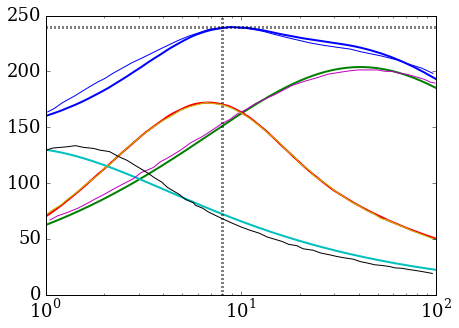

In [683]:
plot(nico1[:,0], nico1[:,1], lw=2)
plot(nico1[:,0], nico1[:,2], lw=2)
plot(nico1[:,0], nico1[:,3], lw=2)
plot(nico1[:,0], nico1[:,4], lw=2)


plot(haloPM[:,0], haloPM[:,1])
plot(diskPM[:,0], diskPM[:,1])
plot(bulgePM[:,0], bulgePM[:,1])
plot(MWPM[:,0], MWPM[:,1])

xscale('log')
xlim(1, 100)

axvline(8, lw=3, c='k', ls=':')
axhline(240, lw=3, c='k', ls=':')

------------------------------------------

# Data from simulations

# $1.6 \times 10^{12} M_{\odot}$

In [85]:
Mvir2 = 1.6E12
MDisk2 = 4.5E10
MW_halo2 = Mvir2 
c2 = 18
print(MW_halo2)
Mb= 1.2E10

1600000000000.0


In [86]:
Mhalo_H2, a2, rs2 = hernquist_param(c2, MW_halo2)
print('Halo Hernquist mass: ', Mhalo_H2)
print('Hernquist scale length: ', a2)
print('NFW scale length: ', rs2)

Halo Hernquist mass:  2.02462915759e+12
Hernquist scale length:  38.35530134607776
NFW scale length:  17.06086099935655


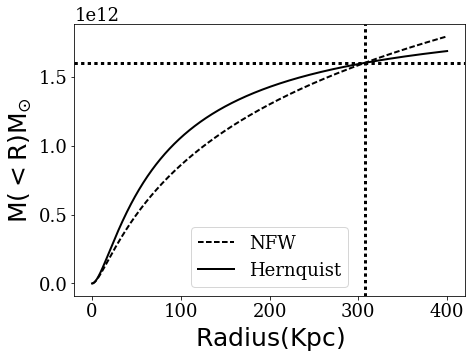

In [87]:
figure(figsize(7, 5))
MassNFWN2 = mass_NFW(c2, 0, rN, 0, MW_halo2)
MassHernN2 = mass_hernquist(a2, rN, Mhalo_H2)
plot(rN, MassNFWN2, lw=2, c='k', ls='--', label='NFW')
plot(rN, MassHernN2, lw=2, c='k', ls='-', label='Hernquist')
plt.axvline(rvir(MW_halo2, 0).value, lw=3, ls=':', c='k')
plt.axhline(MW_halo2, lw=3, ls=':', c='k')
legend(loc='best')
ylabel(r'$\mathrm{M(<R)M_{\odot}}$', fontsize=25)
xlabel(r'$\mathrm{Radius(Kpc)}$', fontsize=25)

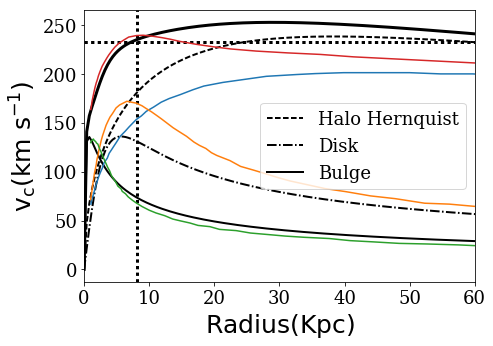

In [82]:
figure(figsize=(7, 5))
vrot2 = vc_NFW(c2, 0, rN, 0, MW_halo2)
vhalo2 = vc_hernquist(a2, 0, rN, 0, Mhalo_H2)
teo_disk_vc2 = vc_mn(3.5, 0.53 ,rN, 0, 0, MDisk2)
vbulge = vc_hernquist(0.7, 0, rN, 0, Mb)
vtot2 = np.sqrt(teo_disk_vc2**2 + vhalo2**2 + vbulge**2)

#plot(rN, vrot2, lw=2, ls='--', c='k', alpha=0.5, label='Halo NFW')
plot(rN, vhalo2, lw=2, ls='--', c='k', label='Halo Hernquist')
plot(rN, teo_disk_vc2, lw=2, ls='-.', c='k', label='Disk')
plot(rN, vbulge, lw=2, ls='-', c='k', label='Bulge')
plot(rN, vtot2, lw=3, c='k')

xlim(0, 60)
axvline(8.2, lw=3, c='k', ls=':')
axhline(232.8, lw=3, c='k', ls=':')
legend(loc='best')

plot(haloPM[:,0], haloPM[:,1])
plot(diskPM[:,0], diskPM[:,1])
plot(bulgePM[:,0], bulgePM[:,1])
plot(MWPM[:,0], MWPM[:,1])


ylabel(r'$\mathrm{v_c(km\ s^{-1})}}$', fontsize=25)
xlabel(r'$\mathrm{Radius(Kpc)}$', fontsize=25)

# $0.9 \times 10^{12} M_{\odot}$

In [98]:
Mvir3 = 0.9E12
MDisk3 = 6.5E10
c3 = 12
Mb= 1.34E10
print(MW_halo3)

823000000000.0


In [99]:
Mhalo_H3, a3, rs3 = hernquist_param(c3, MW_halo3)
print('Halo Hernquist mass: ', Mhalo_H3)
print('Hernquist scale length: ', a3)
print('NFW scale length: ', rs3)

Halo Hernquist mass:  1.14181011263e+12
Hernquist scale length:  43.76570040201125
NFW scale length:  20.504640272307746


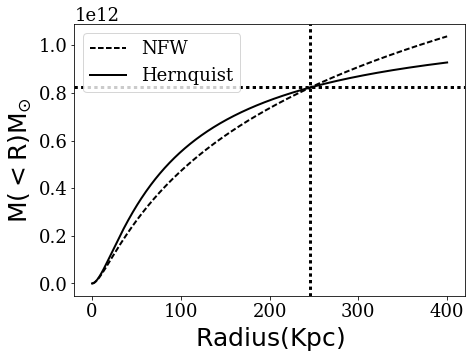

In [100]:
figure(figsize(7, 5))
MassNFWN3 = mass_NFW(c3, 0, rN, 0, MW_halo3)
MassHernN3 = mass_hernquist(a3, rN, Mhalo_H3)
plot(rN, MassNFWN3, lw=2, c='k', ls='--', label='NFW')
plot(rN, MassHernN3, lw=2, c='k', ls='-', label='Hernquist')
plt.axvline(rvir(MW_halo3, 0).value, lw=3, ls=':', c='k')
plt.axhline(MW_halo3, lw=3, ls=':', c='k')
legend(loc='best')
ylabel(r'$\mathrm{M(<R)M_{\odot}}$', fontsize=25)
xlabel(r'$\mathrm{Radius(Kpc)}$', fontsize=25)

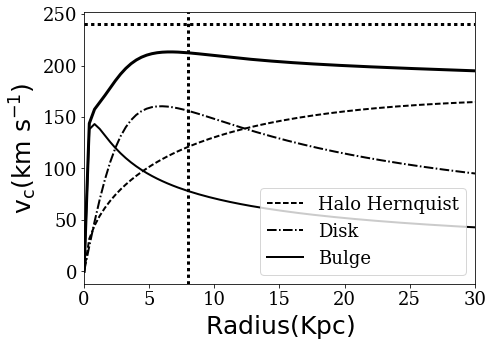

In [101]:
figure(figsize=(7, 5))
vrot3 = vc_NFW(c3, 0, rN, 0, MW_halo3)
vhalo3 = vc_hernquist(a3, 0, rN, 0, Mhalo_H3)
teo_disk_vc3 = vc_mn(3.5, 0.68 ,rN, 0, 0, MDisk3)
vbulge = vc_hernquist(0.7, 0, rN, 0, Mb)
vtot3 = np.sqrt(teo_disk_vc3**2 + vhalo3**2 + vbulge**2)

#plot(rN, vrot3, lw=2, ls='--', c='k', alpha=0.5, label='Halo NFW')
plot(rN, vhalo3, lw=2, ls='--', c='k', label='Halo Hernquist')
plot(rN, teo_disk_vc3, lw=2, ls='-.', c='k', label='Disk')
plot(rN, vbulge, lw=2, ls='-', c='k', label='Bulge')
plot(rN, vtot3, lw=3, c='k')

xlim(0, 30)
axvline(8, lw=3, c='k', ls=':')
axhline(240, lw=3, c='k', ls=':')
legend(loc='lower right')

ylabel(r'$\mathrm{v_c(km\ s^{-1})}}$', fontsize=25)
xlabel(r'$\mathrm{Radius(Kpc)}$', fontsize=25)

In [ ]:
diskt1 = vc_mn(3.5, 0.53 ,rN, 0, 0, MDisk3)
diskt2 = vc_mn(3.5, 0.53 ,rN, 0, 0, MDisk3*2)
diskt3 = vc_mn(3.5, 0.53 ,rN, 0, 0, MDisk3*4)

diskt4 = vc_mn(3.5, 0.53 ,rN, 0, 0, MDisk3)
diskt5 = vc_mn(3.5*2.0, 0.53 ,rN, 0, 0, MDisk3)
diskt6 = vc_mn(3.5*4.0, 0.53 ,rN, 0, 0, MDisk3)

In [ ]:
plot(rN, diskt1)
plot(rN, diskt2)
plot(rN, diskt3)

In [ ]:
plot(rN, diskt4)
plot(rN, diskt5)
plot(rN, diskt6)